Dataset columns are as follows:<br>
■ id - ID<br>
■ battery_power - Total energy a battery can store in one time measured in mAh<br>
■ blue - Has Bluetooth or not (binary) <br>
■ clock_speed - The speed at which the microprocessor executes instructions<br>
■ dual_sim - Has dual sim support or not (binary) <br>
■ fc - Front Camera megapixels <br>
■ four_g - Has 4G or not (binary) <br>
■ int_memory - Internal Memory in Gigabytes <br>
■ m_dep - Mobile Depth in cm <br>
■ mobile_wt - Weight of mobile phone <br>
■ n_cores - Number of cores of the processor <br>
■ pc - Primary Camera megapixels <br>
■ px_height - Pixel Resolution Height <br>
■ px_width - Pixel Resolution Width<br>
■ ram - Random Access Memory in Megabytes<br>
■ sc_h - Screen Height of mobile in cm <br>
■ sc_w - Screen Width of mobile in cm <br>
■ talk_time - longest time that a single battery charge will last when you are<br>
■ three_g - Has 3G or not (binary)<br>
■ touch_screen - Has touch screen or not (binary)<br>
■ wifi - Has wifi or not (binary)<br>
■ price_range - This is the target variable with the value of<br>
● 0 (low cost) <br>
● 1 (medium cost) <br>
● 2 (high cost) <br>
● 3 (very high cost)

#Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

#1- Load and clean Data

##1.1 - Load data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Device price prediction/train - train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Device price prediction/test - test.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


##1.2 Missing and dublicate values

In [8]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


In [9]:
df.duplicated().sum()

0

In [10]:
# Fill missing numerical values with the mean
numerical_columns = ['fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w','n_cores']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing binary values with the mode
binary_columns = ['four_g']
for col in binary_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [12]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


##1.3 - Feature Engineering

In [13]:
df['Pixels Dimension']=df['px_height']*df['px_width']

df.drop(columns=['px_height','px_width'],inplace=True)

In [14]:
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [15]:
def mg_to_gb(value):
    return value / 1024

# Apply the function to the 'ram' column
df['ram'] = df['ram'].apply(mg_to_gb)

In [16]:
 df.drop(columns=['three_g'],inplace=True)

In [17]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,Pixels Dimension,Screen Dimension
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2.489258,19,0,1,1,15120.0,63.0
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2.569336,7,1,0,2,1799140.0,51.0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2.541992,9,1,0,2,2167308.0,22.0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2.704102,11,0,0,2,2171776.0,128.0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1.377930,15,1,0,1,1464096.0,16.0


#2- EDA

##2.1 - descriptive

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.00,851.750000,1226.000000,1.615250e+03,1.998000e+03
blue,2000.0,0.495000,0.500100,0.00,0.000000,0.000000,1.000000e+00,1.000000e+00
clock_speed,2000.0,1.522250,0.816004,0.50,0.700000,1.500000,2.200000e+00,3.000000e+00
dual_sim,2000.0,0.509500,0.500035,0.00,0.000000,1.000000,1.000000e+00,1.000000e+00
fc,2000.0,4.310276,4.330340,0.00,1.000000,3.000000,7.000000e+00,1.900000e+01
four_g,2000.0,0.522500,0.499618,0.00,0.000000,1.000000,1.000000e+00,1.000000e+00
int_memory,2000.0,32.048120,18.123767,2.00,16.000000,32.000000,4.800000e+01,6.400000e+01
m_dep,2000.0,0.502256,0.288169,0.10,0.200000,0.500000,8.000000e-01,1.000000e+00
mobile_wt,2000.0,140.266533,35.349256,80.00,109.000000,141.000000,1.700000e+02,2.000000e+02
n_cores,2000.0,4.518036,2.286655,1.00,3.000000,4.000000,7.000000e+00,8.000000e+00


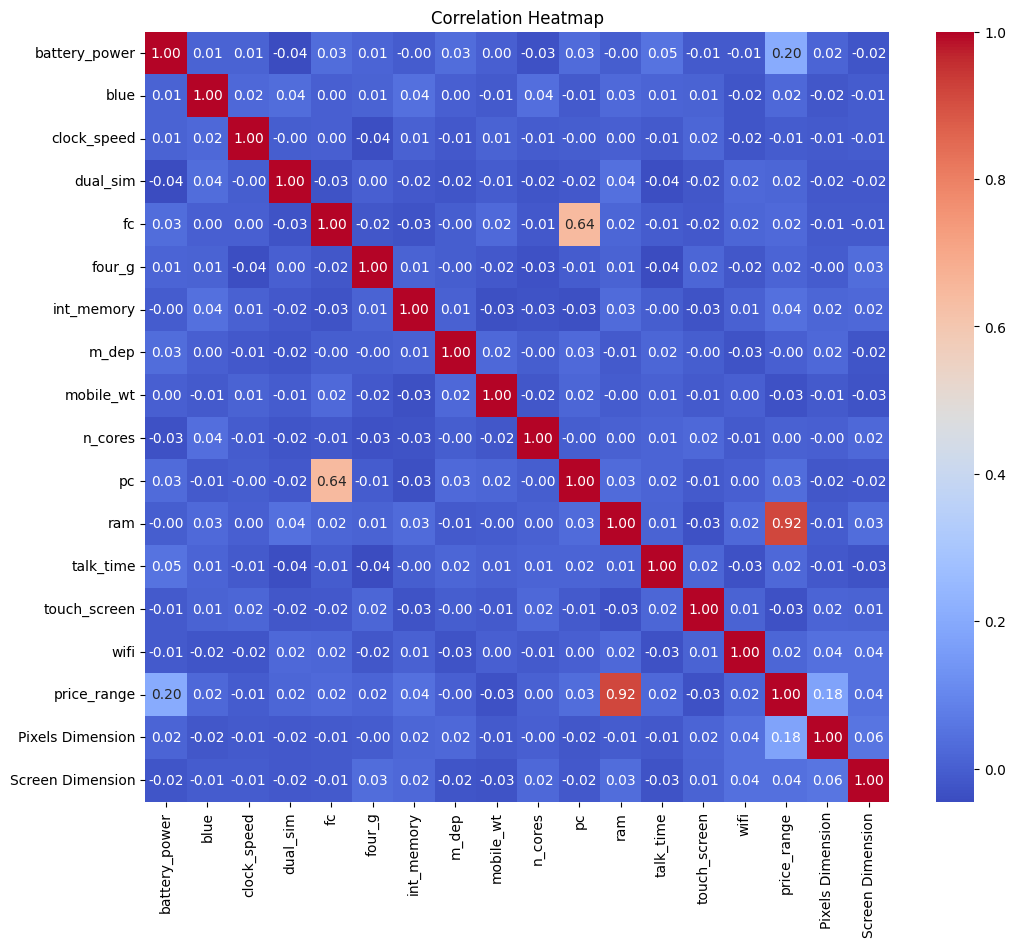

In [19]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


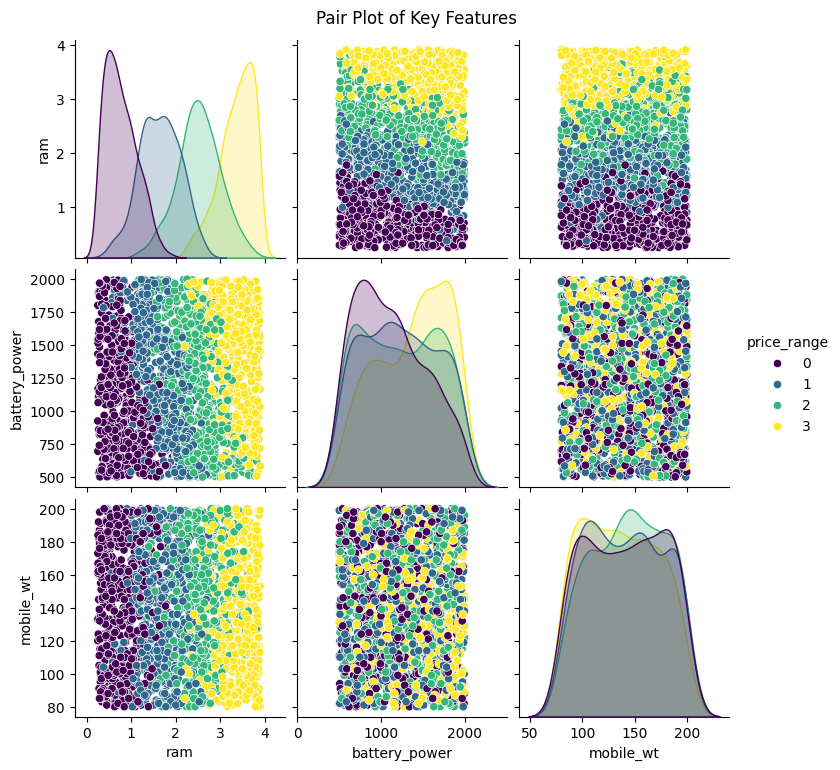

In [21]:
import seaborn as sns

sns.pairplot(df, vars=['ram', 'battery_power', 'mobile_wt'], hue='price_range', palette='viridis')
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


In [22]:
# Correlation with target variable
target_correlation = correlation_matrix['price_range'].sort_values(ascending=False)

print("\nFeatures with highest correlation to price_range:")
print(target_correlation.head(10))



Features with highest correlation to price_range:
price_range         1.000000
ram                 0.917027
battery_power       0.200723
Pixels Dimension    0.175803
int_memory          0.042527
Screen Dimension    0.041412
pc                  0.034589
fc                  0.024963
talk_time           0.021859
blue                0.020573
Name: price_range, dtype: float64


#3 - Data Preperation

In [23]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,Pixels Dimension,Screen Dimension
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2.489258,19,0,1,1,15120.0,63.0
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2.569336,7,1,0,2,1799140.0,51.0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2.541992,9,1,0,2,2167308.0,22.0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2.704102,11,0,0,2,2171776.0,128.0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1.377930,15,1,0,1,1464096.0,16.0


In [24]:
temp_df = df.copy()
X = temp_df.drop(columns=['price_range'])
y = temp_df['price_range']

In [25]:
X.shape

(2000, 17)

In [26]:
y.shape

(2000,)

##3.2 Train Test Split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train.shape

(1500, 17)

In [29]:
X_test.shape

(500, 17)

In [30]:
stand = StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

#4 - Featcher Selection

In [31]:
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

## 4.1 - feature selection using chi-square

In [32]:
for i in range(5,10):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=i)
    chi_selector.fit(X = X_norm, y = y.values)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    print(str(chi_feature), 'selected features')

['battery_power', 'mobile_wt', 'ram', 'touch_screen', 'Pixels Dimension'] selected features
['battery_power', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension'] selected features
['battery_power', 'four_g', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension'] selected features
['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension'] selected features
['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension', 'Screen Dimension'] selected features


##4.2 - feature selection using randomforest

In [33]:
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=80, random_state=0)).fit(X, y)
rf_support = rf_selector.get_support()
rf_feature = X.loc[:, rf_support].columns.tolist()
print(str(rf_feature), 'selected features')

['battery_power', 'ram', 'Pixels Dimension'] selected features


## 4.3 Testing

In [34]:
#all feature
X0 = X.values
#chi-square
X1 = df[['battery_power', 'mobile_wt', 'ram', 'touch_screen', 'Pixels Dimension']].values
X2 = df[['battery_power', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension']].values
X3 = df[['battery_power', 'four_g', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension']].values
X4 = df[['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension']].values
X5 = df[['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'ram', 'touch_screen', 'Pixels Dimension', 'Screen Dimension']].values

#randomforest
X6 = df[['battery_power', 'ram', 'Pixels Dimension']].values
x = [X0, X1, X2, X3, X4, X5, X6]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
scores = []
scores.append(("feature group", "train_score", "test_score", "f1_score"))
i = 0
for X_i in x:
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, test_size=0.25,random_state=42)
    lr = LogisticRegression().fit(X_train,y_train)
    lr_predicted = lr.predict(X_test)
    train_score = accuracy_score(y_train,lr.predict(X_train))
    test_score = accuracy_score(y_test,lr_predicted)
    f1 = f1_score(y_test,lr_predicted, average = 'weighted')

    scores.append(("X"+str(i), str(train_score)[:5], str(test_score)[:5], str(f1)[:5]))
    i+=1

In [37]:
print(scores[0][0] + "\t" + scores[0][1] + "\t" + scores[0][2] + "\t" + scores[0][3] + "\t" )
for i in range(1,len(scores)):
    print(scores[i][0] + "\t\t" + scores[i][1] + "\t\t" + scores[i][2] + "\t\t" + scores[i][3] + "\t\t")

feature group	train_score	test_score	f1_score	
X0		0.317		0.318		0.277		
X1		0.326		0.33		0.296		
X2		0.328		0.328		0.292		
X3		0.327		0.33		0.295		
X4		0.32		0.338		0.306		
X5		0.316		0.318		0.277		
X6		0.27		0.304		0.205		


In [38]:
X = X4

# 5 - Model Selection

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, target_names):
    """
    Train and evaluate a given machine learning model using GridSearchCV.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, RandomForestClassifier).
        param_grid: Dictionary of hyperparameters to search.
        X_train: Training features.
        y_train: Training target.
        X_test: Test features.
        y_test: Test target.
        target_names: List of target class names (for labeling the confusion matrix).

    Returns:
        best_model: The best trained model after GridSearchCV.
        y_pred: Predictions from the best model.
        accuracy: Accuracy score of the model.
        classification_report_result: Classification report of the model.
    """
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report_result)

    # Plot confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.title("Confusion Matrix")
    plt.show()

    return best_model, y_pred, accuracy, classification_report_result


In [40]:
X.shape

(2000, 8)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.324
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.41      0.39       132
           1       0.24      0.08      0.12       118
           2       0.22      0.25      0.23       120
           3       0.38      0.53      0.44       130

    accuracy                           0.32       500
   macro avg       0.30      0.32      0.30       500
weighted avg       0.31      0.32      0.30       500



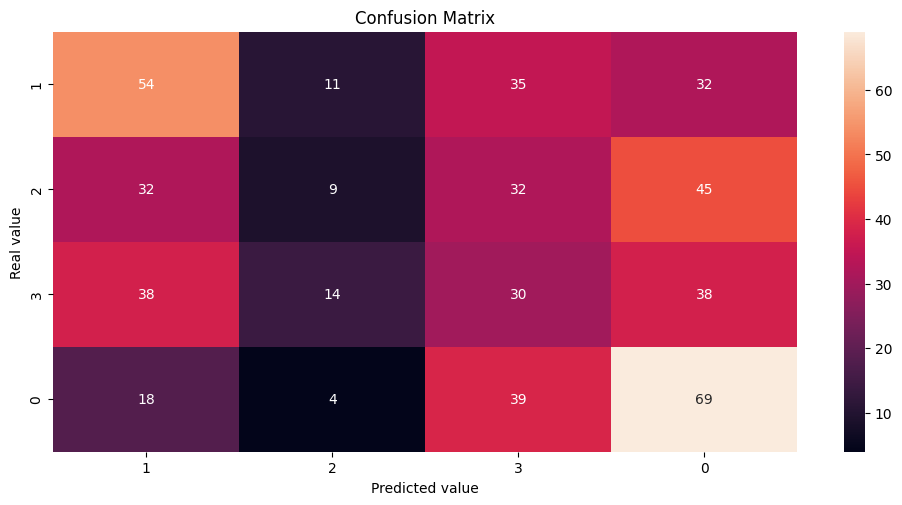

In [42]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Hyperparameters to tune
param_grid_lr = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Call the function
best_lr, y_pred_lr, accuracy_lr, report_lr = train_and_evaluate_model(
    LogisticRegression(max_iter=1000), param_grid_lr, X_train, y_train, X_test, y_test,
    df['price_range'].unique())


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.294
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.38       132
           1       0.27      0.35      0.31       118
           2       0.27      0.21      0.23       120
           3       0.28      0.18      0.22       130

    accuracy                           0.29       500
   macro avg       0.29      0.29      0.28       500
weighted avg       0.29      0.29      0.29       500



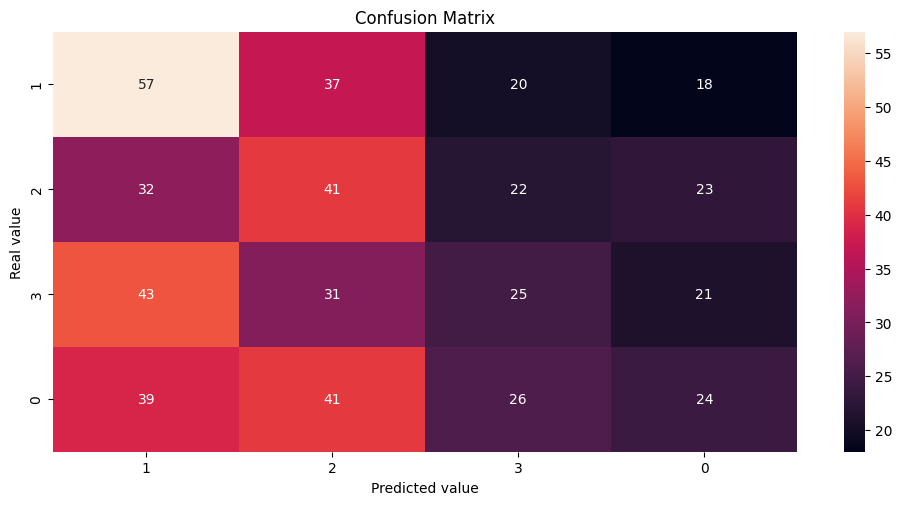

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Call the function
best_knn, y_pred_knn, accuracy_knn, report_knn = train_and_evaluate_model(
    KNeighborsClassifier(), param_grid_knn, X_train, y_train, X_test, y_test, df['price_range'].unique())


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       132
           1       0.73      0.78      0.75       118
           2       0.77      0.73      0.75       120
           3       0.89      0.92      0.91       130

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



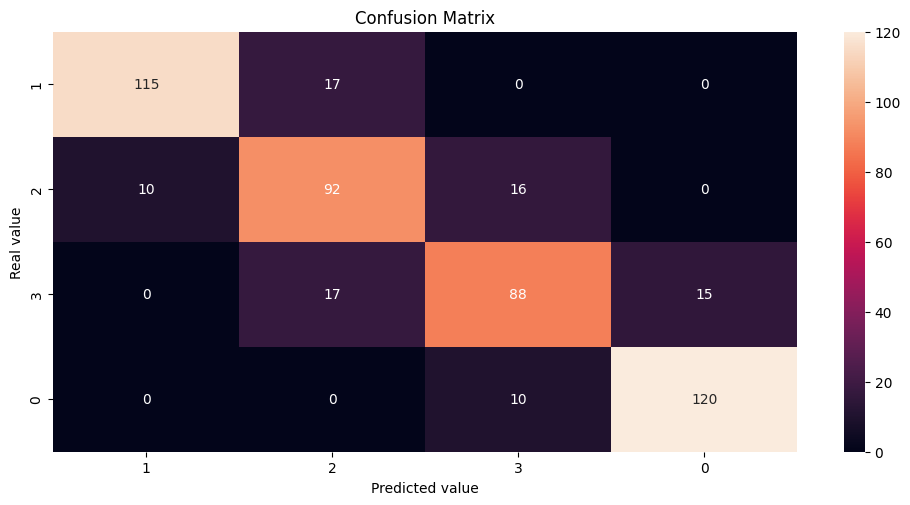

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Hyperparameters to tune
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Call the function
best_dt, y_pred_dt, accuracy_dt, report_dt = train_and_evaluate_model(
    DecisionTreeClassifier(), param_grid_dt, X_train, y_train, X_test, y_test, df['price_range'].unique())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.884
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       132
           1       0.85      0.89      0.87       118
           2       0.84      0.80      0.82       120
           3       0.90      0.90      0.90       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



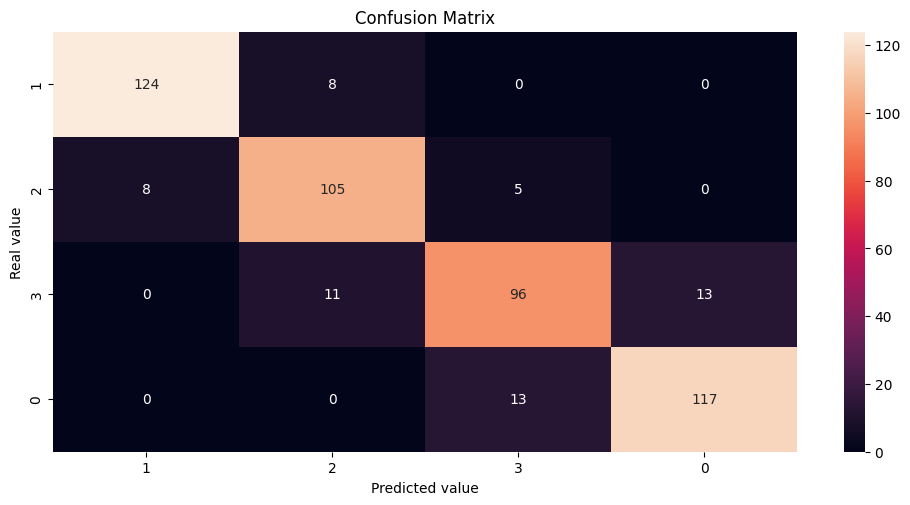

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Call the function
best_rf, y_pred_rf, accuracy_rf, report_rf = train_and_evaluate_model(
    RandomForestClassifier(), param_grid_rf, X_train, y_train, X_test, y_test,  df['price_range'].unique())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       132
           1       0.84      0.90      0.87       118
           2       0.88      0.85      0.86       120
           3       0.93      0.94      0.93       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



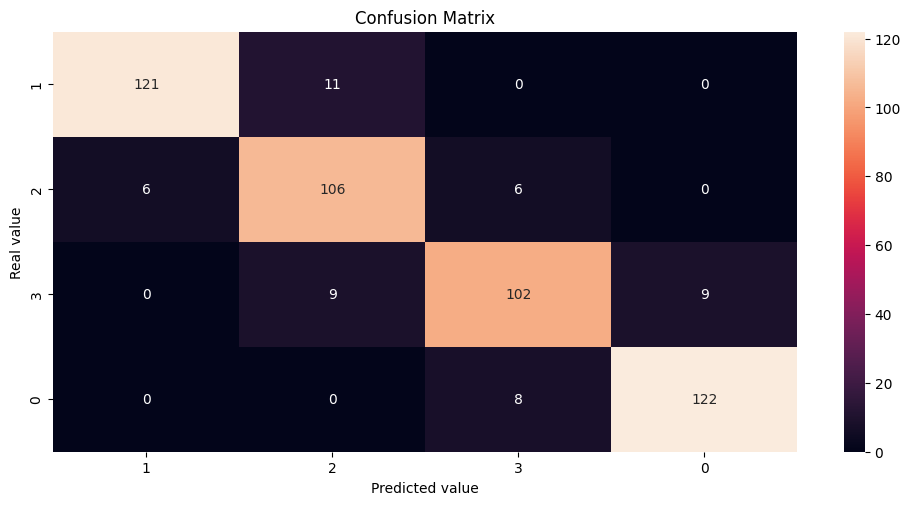

In [46]:
import xgboost as xgb

# XGBoost Hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Call the function
best_xgb, y_pred_xgb, accuracy_xgb, report_xgb = train_and_evaluate_model(
    xgb.XGBClassifier(), param_grid_xgb, X_train, y_train, X_test, y_test,df['price_range'].unique())


The best model with hight F1-Score and recall is xgboots with  Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

In [47]:
# importing the joblib libraray
import joblib


In [51]:
model = xgb.XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 6, n_estimators= 200, subsample= 0.8)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       132
           1       0.84      0.90      0.87       118
           2       0.88      0.85      0.86       120
           3       0.93      0.94      0.93       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



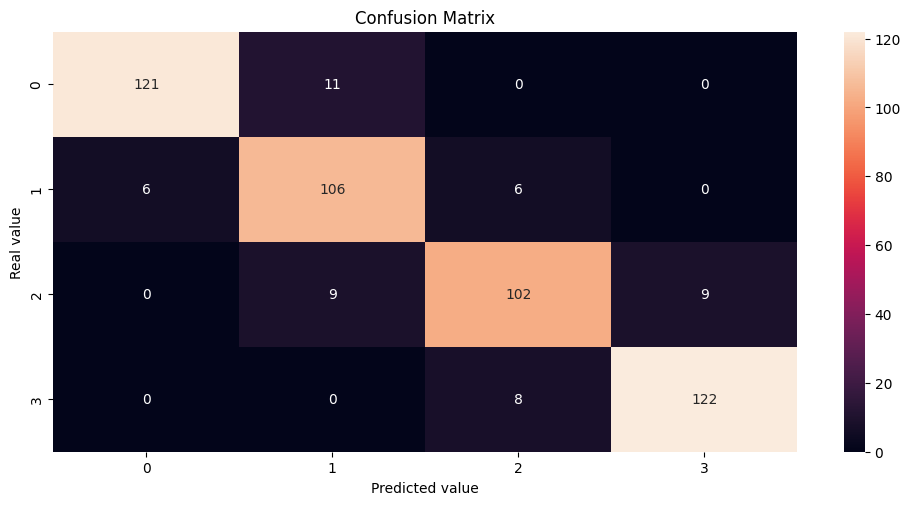

In [52]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

# Plot confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title("Confusion Matrix")
plt.show()

In [53]:

joblib.dump(model, 'model.joblib')

['model.joblib']